# Load dataset

In [254]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data_path = "train_nov22_no_trace.pkl"
with open(data_path, 'rb') as f:
    data = pickle.load(f)

# Auxiliary Functions

In [255]:
from torch.autograd import Variable
def to_variable(X, cuda=True):
    if isinstance(X, (tuple, list)):
        return tuple(to_variable(x) for x in X)
    else:
        X = Variable(X)
        if cuda:
            return X.cuda().requires_grad_()
        return X.requires_grad_()

# Load model

In [256]:
import stabledynamics  # Replace with the actual name of your model class

# Load the model
model_props = {"latent_space_dim": 142, "a": 0.001, "projfn": "PSD-REHU", "projfn_eps": 0.01, "smooth_v": 0, "hp": 300, "h": 300, "rehu": 0.005, "dt": 1}
stabledynamics.configure(model_props)  # Replace with the actual name of your model class
model = stabledynamics.model

In [257]:
# Load the state dict
state_dict_path = "saved_model.pth"
checkpoint = torch.load(state_dict_path)

# Load the model's state dict
model.load_state_dict(checkpoint)
model.eval()

NextStateGenerator(
  (network): Dynamics(
    (fhat): Sequential(
      (0): Linear(in_features=142, out_features=300, bias=True)
      (1): ReLU()
      (2): Linear(in_features=300, out_features=300, bias=True)
      (3): ReLU()
      (4): Linear(in_features=300, out_features=142, bias=True)
    )
    (V): MakePSD(
      (f): ICNN(
        (W): ParameterList(
            (0): Parameter containing: [torch.float64 of size 300x142]
            (1): Parameter containing: [torch.float64 of size 300x142]
            (2): Parameter containing: [torch.float64 of size 1x142]
        )
        (U): ParameterList(
            (0): Parameter containing: [torch.float64 of size 300x300]
            (1): Parameter containing: [torch.float64 of size 1x300]
        )
        (bias): ParameterList(
            (0): Parameter containing: [torch.float64 of size 300]
            (1): Parameter containing: [torch.float64 of size 300]
            (2): Parameter containing: [torch.float64 of size 1]
       

# Run Predictions

In [258]:
start = to_variable(torch.tensor(np.array(data.iloc[0:1])), cuda=False)
path = []
for i in range(1, 100000):
    k1 = model(start)
    k1.detach()
    start = k1
    start.detach()
    path.append(start[0][53].item())

In [259]:
pit300 = list(data["ZW_PIT300.DATA"])
len(pit300)

350088

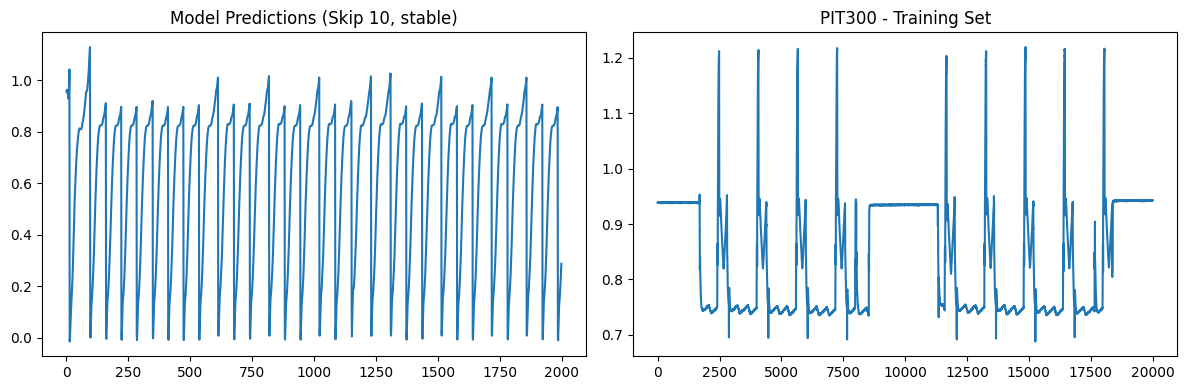

In [260]:
y1 = path[:2000]
y2 = pit300

plt.figure(figsize=(12, 4))

# Plotting the first set of points
plt.subplot(1, 2, 1)
plt.plot(y1, label='Model predictions')
plt.title('Model Predictions (Skip 10, stable)')

# Plotting the second set of points
plt.subplot(1, 2, 2)
plt.plot(y2[:20000], label='PIT300')
plt.title('PIT300 - Training Set')

# # Plotting both lines in the same plot
# plt.subplot(1, 2, 1)
# plt.plot(y1, label='Line 1')
# plt.plot(y2, label='Line 2')
# plt.legend()
# plt.title('Both Lines')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


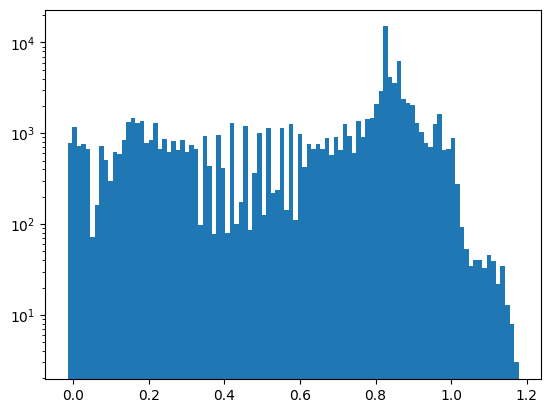

In [262]:
plt.hist(path, bins=100, log=True)
plt.show()

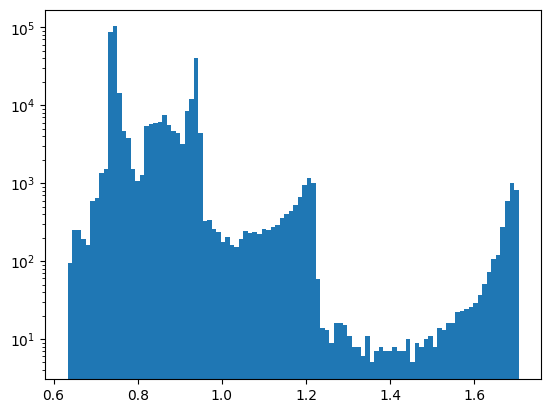

In [263]:
plt.hist(pit300, bins=100, log=True)
plt.show()